In [23]:
import numpy as np
import pandas as pd

import MLutils as ml

In [24]:
# Load data
housing_test = pd.read_csv('housing_test.txt', header=None, delim_whitespace=True,
                           names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                                  'B', 'LSTAT', 'MEDV'])
housing_train = pd.read_csv('housing_train.txt', header=None, delim_whitespace=True,
                            names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                                   'B', 'LSTAT', 'MEDV'])
spambase = pd.read_csv('spambase.data', header=None, delim_whitespace=False,
                       names=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                              'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order',
                              'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
                              'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business',
                              'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
                              'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
                              'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
                              'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
                              'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
                              'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
                              'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
                              'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
                              'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
                              'capital_run_length_total', 'spam'])

In [25]:
# Display data
display(housing_train)
display(housing_test)
display(spambase)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
429,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
430,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
431,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
1,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
2,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
3,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4
4,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307.0,21.0,380.23,11.98,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
70,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
71,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391.0,19.2,396.90,12.01,21.8
72,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391.0,19.2,396.90,13.59,24.5


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [26]:
# Normalize data without labels
housing_train.iloc[:, :-1], housing_train_avg, housing_train_stdev = ml.normalize(housing_train.iloc[:, :-1])
housing_test.iloc[:, :-1] = (housing_test.iloc[:, :-1] - housing_train_avg) / housing_train_stdev
spambase.iloc[:, :-1] = ml.normalize(spambase.iloc[:, :-1])[0]

In [27]:
# Display normalized data
display(housing_train)
display(housing_test)
display(spambase)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.406074,0.271666,-1.269381,-0.267612,-0.128607,0.384651,-0.095048,0.140689,-0.969579,-0.612355,-1.449420,0.409077,-1.046568,24.0
1,-0.403616,-0.486839,-0.554501,-0.267612,-0.726487,0.168444,0.397814,0.567315,-0.854463,-0.934791,-0.274757,0.409077,-0.459782,21.6
2,-0.403618,-0.486839,-0.554501,-0.267612,-0.726487,1.241055,-0.242547,0.567315,-0.854463,-0.934791,-0.274757,0.360950,-1.180570,34.7
3,-0.403023,-0.486839,-1.288905,-0.267612,-0.821802,0.978518,-0.792968,1.099976,-0.739347,-1.054212,0.148121,0.382235,-1.334319,33.4
4,-0.398727,-0.486839,-1.288905,-0.267612,-0.821802,1.187706,-0.490776,1.099976,-0.739347,-1.054212,0.148121,0.409077,-0.997199,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,-0.399479,-0.486839,0.175397,-0.267612,0.174665,0.409922,0.045256,-0.643102,-0.969579,-0.749689,1.228811,0.351017,-0.385023,22.4
429,-0.401512,-0.486839,0.175397,-0.267612,0.174665,-0.254143,0.318668,-0.736054,-0.969579,-0.749689,1.228811,0.409077,-0.468245,20.6
430,-0.399698,-0.486839,0.175397,-0.267612,0.174665,0.947632,0.833114,-0.794423,-0.969579,-0.749689,1.228811,0.409077,-0.953472,23.9
431,-0.393978,-0.486839,0.175397,-0.267612,0.174665,0.692114,0.771956,-0.686733,-0.969579,-0.749689,1.228811,0.368282,-0.834987,22.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.308363,-0.486839,-0.393803,-0.267612,-0.128607,-0.985596,0.642445,0.318032,-0.624231,-0.546674,1.228811,-0.696315,0.579789,13.9
1,-0.328114,-0.486839,-0.393803,-0.267612,-0.128607,-0.685153,0.807932,0.428641,-0.624231,-0.546674,1.228811,0.172343,0.339996,16.6
2,-0.294866,-0.486839,-0.393803,-0.267612,-0.128607,-0.356630,0.753969,0.317449,-0.624231,-0.546674,1.228811,-0.661313,0.688401,14.8
3,-0.316275,-0.486839,-0.393803,-0.267612,-0.128607,0.272336,0.955430,0.318081,-0.624231,-0.546674,1.228811,0.303126,0.056477,18.4
4,-0.289399,-0.486839,-0.393803,-0.267612,-0.128607,0.523641,0.700006,0.213164,-0.624231,-0.546674,1.228811,0.211956,-0.059187,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.394429,-0.486839,2.549819,-0.267612,0.486603,-0.446483,1.113722,-0.940052,-0.624231,1.865625,0.805933,0.328786,0.799834,13.6
70,-0.393776,-0.486839,2.549819,-0.267612,0.486603,-0.446483,0.563300,-0.822439,-0.624231,1.865625,0.805933,0.409077,0.134057,20.1
71,-0.386515,-0.486839,-0.161017,-0.267612,0.278645,-0.833971,-0.497971,-0.690235,-0.393999,-0.045107,0.383054,0.409077,-0.054956,21.8
72,-0.374069,-0.486839,-0.161017,-0.267612,0.278645,-0.526507,-0.908089,-0.690235,-0.393999,-0.045107,0.383054,0.409077,0.167910,24.5


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,-0.342396,0.330849,0.712781,-0.046894,0.011563,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,0.623939,-0.308321,-0.103037,-0.045242,0.045293,-0.008723,1
1,0.345322,0.051904,0.435082,-0.046894,-0.256089,0.672326,0.244717,-0.088001,-0.323267,1.086593,...,-0.158436,-0.026004,-0.155181,0.126189,0.423737,0.008762,-0.002443,0.250536,1.228191,1
2,-0.145906,-0.165054,0.851631,-0.046894,1.364698,0.343648,0.193623,0.036666,1.973802,0.016420,...,-0.117364,0.014683,-0.155181,0.008495,0.440005,-0.079746,0.145905,2.220865,3.258378,1
3,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,...,-0.158436,-0.007510,-0.155181,-0.161917,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205,1
4,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,...,-0.158436,-0.014908,-0.155181,-0.164369,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.672807,-0.165054,0.673110,-0.046894,-0.464264,0.781886,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,0.343879,-0.155181,-0.329876,-0.308321,-0.103037,-0.127626,-0.252309,-0.322075,0
4597,-0.342396,-0.165054,-0.556700,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.514251,-0.155181,0.102896,-0.308321,-0.103037,-0.114610,-0.247178,-0.444117,0
4598,0.640058,-0.165054,0.038369,-0.046894,-0.464264,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,0.260504,2.141513,-0.155181,-0.329876,-0.308321,-0.103037,-0.119369,-0.236916,-0.272598,0
4599,2.801459,-0.165054,-0.556700,-0.046894,0.011563,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,...,-0.158436,-0.303417,-0.155181,-0.329876,-0.308321,-0.103037,-0.127469,-0.242047,-0.338567,0


In [28]:
# Describe data
display(housing_train.describe())
display(housing_test.describe())
display(spambase.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,4.330000e+02,4.330000e+02,433.000000,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,433.000000
mean,6.563905e-17,1.640976e-17,0.000000,-6.563905e-17,-1.476879e-16,5.661368e-16,1.887123e-16,8.204881e-17,-1.640976e-16,3.281953e-17,5.743417e-16,-3.446050e-16,-3.281953e-17,22.867206
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.497501
min,-4.060742e-01,-4.868385e-01,-1.547223,-2.676124e-01,-1.393687e+00,-3.846830e+00,-2.336308e+00,-1.299261e+00,-9.695790e-01,-1.263199e+00,-2.718055e+00,-4.280446e+00,-1.504995e+00,5.000000
25%,-3.984385e-01,-4.868385e-01,-0.845860,-2.676124e-01,-8.651264e-01,-5.798571e-01,-8.433338e-01,-8.238987e-01,-6.242313e-01,-7.258052e-01,-6.506492e-01,1.708055e-01,-7.969020e-01,17.200000
50%,-3.799111e-01,-4.868385e-01,-0.330726,-2.676124e-01,-1.805968e-01,-1.291918e-01,2.503149e-01,-2.281509e-01,-5.091154e-01,-5.227899e-01,1.481214e-01,3.550376e-01,-2.566636e-01,21.500000
75%,1.118072e-02,3.990081e-02,1.102037,-2.676124e-01,6.165769e-01,4.604637e-01,9.158576e-01,6.876996e-01,1.678087e+00,1.596929e+00,8.529190e-01,4.090775e-01,5.670940e-01,25.100000
max,1.001486e+01,3.727076e+00,2.235933,3.728118e+00,2.756815e+00,3.480342e+00,1.156892e+00,4.049677e+00,1.678087e+00,1.596929e+00,1.322784e+00,4.090775e-01,3.467172e+00,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.107248,-0.061176,0.270379,0.056366,0.097501,-0.123766,0.106608,-0.011508,0.102243,0.316706,0.226221,-0.429456,0.184436,21.171622
std,1.046984,0.873962,1.053129,1.098118,1.021359,0.866413,1.081841,1.148877,1.008596,0.930946,1.093038,1.410777,0.979311,6.505351
min,-0.405531,-0.486839,-1.351982,-0.267612,-1.454342,-3.036755,-2.196004,-1.295662,-0.969579,-0.988531,-2.530109,-4.253485,-1.344193,10.200000
25%,-0.391656,-0.486839,-0.685162,-0.267612,-1.003765,-0.597406,-0.879309,-0.822342,-0.624231,-0.409340,-0.227771,-0.488226,-0.414292,16.750000
50%,-0.342517,-0.486839,0.310563,-0.267612,0.269980,-0.134106,0.584885,-0.510971,-0.509115,-0.003310,0.829426,0.288227,0.098793,20.100000
75%,0.041908,-0.486839,1.102037,-0.267612,0.616577,0.336566,0.990506,0.414620,1.678087,1.596929,0.852919,0.382117,0.683817,24.250000
max,5.582659,2.884293,2.549819,3.728118,2.756815,2.748889,1.156892,3.300225,1.678087,1.865625,1.698676,0.409077,3.606816,42.800000


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4601.000000
mean,-3.088645e-17,1.544322e-17,0.000000,-6.177290e-18,3.706374e-17,6.177290e-17,2.470916e-17,-2.470916e-17,9.883663e-17,-6.177290e-18,...,3.706374e-17,-5.559561e-17,2.162051e-17,2.470916e-17,-2.470916e-17,1.853187e-17,3.706374e-17,1.235458e-17,0.000000,0.394045
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.488698
min,-3.423965e-01,-1.650540e-01,-0.556700,-4.689449e-02,-4.642639e-01,-3.502281e-01,-2.917622e-01,-2.625330e-01,-3.232672e-01,-3.713240e-01,...,-1.584361e-01,-5.142507e-01,-1.551808e-01,-3.298764e-01,-3.083214e-01,-1.030372e-01,-1.321017e-01,-2.625709e-01,-0.465557,0.000000
25%,-3.423965e-01,-1.650540e-01,-0.556700,-4.689449e-02,-4.642639e-01,-3.502281e-01,-2.917622e-01,-2.625330e-01,-3.232672e-01,-3.713240e-01,...,-1.584361e-01,-5.142507e-01,-1.551808e-01,-3.298764e-01,-3.083214e-01,-1.030372e-01,-1.135701e-01,-2.369156e-01,-0.409483,0.000000
50%,-3.423965e-01,-1.650540e-01,-0.556700,-4.689449e-02,-4.642639e-01,-3.502281e-01,-2.917622e-01,-2.625330e-01,-3.232672e-01,-3.713240e-01,...,-1.584361e-01,-2.738264e-01,-1.551808e-01,-3.298764e-01,-3.083214e-01,-1.030372e-01,-9.188672e-02,-1.907360e-01,-0.310530,0.000000
75%,-3.423965e-01,-1.650540e-01,0.276397,-4.689449e-02,1.007811e-01,-3.502281e-01,-2.917622e-01,-2.625330e-01,-3.232672e-01,-1.231679e-01,...,-1.584361e-01,1.811304e-01,-1.551808e-01,5.630838e-02,-9.683788e-02,-1.030372e-01,-4.681818e-02,-4.706618e-02,-0.028514,1.000000
max,1.452542e+01,1.089978e+01,9.559480,3.063795e+01,1.440534e+01,2.112341e+01,1.828062e+01,2.743827e+01,1.855577e+01,2.782542e+01,...,1.785190e+01,3.555679e+01,3.715028e+01,3.948762e+01,2.410583e+01,4.608158e+01,3.458328e+01,5.098651e+01,25.658062,1.000000


In [29]:
# Split into features and labels
housing_train_features = housing_train.iloc[:, :-1]
housing_train_labels = housing_train.iloc[:, -1]

housing_test_features = housing_test.iloc[:, :-1]
housing_test_labels = housing_test.iloc[:, -1]

spambase_features = spambase.iloc[:, :-1]
spambase_labels = spambase.iloc[:, -1]

# Problem 1

## Housing Linear Ridge Regression

In [30]:
# Find the best alpha for housing data
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    ridge = ml.RidgeLinearRegression(alpha)
    ridge.fit(housing_train_features, housing_train_labels)
    y_pred = ridge.predict(housing_test_features)
    mse = ml.mse(housing_test_labels, y_pred)
    if mse < best_mse:
        best_alpha = alpha
        best_mse = mse

print('Best alpha: ' + str(best_alpha))
print('Best MSE: ' + str(best_mse))
housing_ridge_regression_alpha = best_alpha
housing_ridge_regression_mse = best_mse

Best alpha: 10
Best MSE: 22.288685981130126


## Spambase Linear Ridge Regression

In [31]:
# Find the best alpha for spambase data
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_accuracy = float('inf')

for alpha in alphas:
    ridge = ml.RidgeLinearRegression(alpha)
    accuracy = ml.cross_validate(ridge, spambase_features, spambase_labels)
    if accuracy < best_accuracy:
        best_alpha = alpha
        best_accuracy = accuracy

print('Best alpha: ' + str(best_alpha))
print('Best accuracy: ' + str(best_accuracy))
spambase_ridge_regression_alpha = best_alpha
spambase_ridge_regression_accuracy = best_accuracy

Best alpha: 10
Best accuracy: 0.8784782608695652


## Housing Linear Regression with Gradient Descent

In [32]:
# Find the best alpha for housing data
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    gradient = ml.LinearGradientDescent(alpha, 1e-4, 100)
    gradient.fit(housing_train_features, housing_train_labels)
    gradient.predict(housing_test_features)
    y_pred = gradient.predict(housing_test_features)
    mse = ml.mse(housing_test_labels, y_pred)
    if mse < best_mse:
        best_alpha = alpha
        best_mse = mse

print('Best alpha: ' + str(best_alpha))
print('Best MSE: ' + str(best_mse))
housing_linear_gradient_alpha = best_alpha
housing_linear_gradient_mse = best_mse

Best alpha: 0.01
Best MSE: 21.11970137777015


## Spambase Linear Regression with Gradient Descent

In [33]:
# Find the best alpha for spambase data
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_accuracy = float('inf')

for alpha in alphas:
    gradient = ml.LinearGradientDescent(alpha, 1e-5, 100)
    accuracy = ml.cross_validate(gradient, spambase_features, spambase_labels)
    if accuracy < best_accuracy:
        best_alpha = alpha
        best_accuracy = accuracy

print('Best alpha: ' + str(best_alpha))
print('Best accuracy: ' + str(best_accuracy))
spambase_linear_gradient_alpha = best_alpha
spambase_linear_gradient_accuracy = best_accuracy

Best alpha: 0.1
Best accuracy: 0.8760869565217391


## Spambase Logistic Regression with Gradient Descent

In [34]:
# Find the best alpha for spambase data
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_accuracy = float('inf')
best_matrix = None

for alpha in alphas:
    logistic = ml.LogisticGradientDescent(alpha, 1e-3, 100)
    accuracy, matrix = ml.cross_validate(logistic, spambase_features, spambase_labels, confusion=True)
    if accuracy < best_accuracy:
        best_alpha = alpha
        best_accuracy = accuracy
        best_matrix = matrix

print('Best alpha: ' + str(best_alpha))
print('Best accuracy: ' + str(best_accuracy))
spambase_logistic_gradient_alpha = best_alpha
spambase_logistic_regression_accuracy = best_accuracy
spambase_logistic_regression_matrix = best_matrix

Best alpha: 100
Best accuracy: 0.9089130434782607


## HW1 Algorithms

In [49]:
# Spambase
# Decision tree
spambase_decision_tree = ml.DecisionTree(max_depth=6, min_instances=5, target_impurity=0.5)
spambase_decision_tree_accuracy, spambase_decision_tree_matrix = ml.cross_validate(spambase_decision_tree,
                                                                                   spambase_features,
                                                                                   spambase_labels,
                                                                                   confusion=True)

# Normal linear regression
spambase_linear_regression = ml.LinearRegression()
spambase_linear_regression_accuracy, spambase_linear_regression_matrix = ml.cross_validate(spambase_linear_regression,
                                                                                           spambase_features,
                                                                                           spambase_labels,
                                                                                           confusion=True)

# Housing
# Decision tree
housing_decision_tree = ml.DecisionTree(criterion="mse", regression=True, max_depth=8, min_instances=5,
                                        target_impurity=1.0)
housing_decision_tree_model = housing_decision_tree.fit(housing_train_features, housing_train_labels)
housing_decision_tree_pred = housing_decision_tree.predict(housing_test_features)
housing_decision_tree_mse = ml.mse(housing_test_labels, housing_decision_tree_pred)

# Normal linear regression
housing_linear_regression = ml.LinearRegression()
housing_linear_regression.fit(housing_train_features, housing_train_labels)
housing_linear_regression_pred = housing_linear_regression.predict(housing_test_features)
housing_linear_regression_mse = ml.mse(housing_test_labels, housing_linear_regression_pred)

## Training Accuracies

In [50]:
# Find training accuracies for all algorithms

# Spambase
pred = np.vectorize(lambda y: 1 if y >= 0.5 else 0)

# Decision tree
spambase_train_decision_tree_model = spambase_decision_tree.fit(spambase_features, spambase_labels)
spambase_train_decision_tree_predictions = spambase_decision_tree.predict(spambase_features)
spambase_train_decision_tree_accuracy = np.sum(
    spambase_train_decision_tree_predictions == spambase_labels) / float(spambase.shape[0])

# Normal linear regression
spambase_linear_regression.fit(spambase_features, spambase_labels)
spambase_train_linear_regression_predictions = pred(spambase_linear_regression.predict(spambase_features))
spambase_train_linear_regression_accuracy = np.sum(
    spambase_train_linear_regression_predictions == spambase_labels) / float(spambase.shape[0])

# Linear ridge regression
spambase_train_ridge_regression = ml.RidgeLinearRegression(spambase_ridge_regression_alpha)
spambase_train_ridge_regression.fit(spambase_features, spambase_labels)
spambase_train_ridge_regression_predictions = pred(spambase_train_ridge_regression.predict(spambase_features))
spambase_train_ridge_regression_accuracy = np.sum(
    spambase_train_ridge_regression_predictions == spambase_labels) / float(spambase.shape[0])

# Linear regression with gradient descent
spambase_train_linear_gradient = ml.LinearGradientDescent(spambase_linear_gradient_alpha, 1e-5, 100)
spambase_train_linear_gradient.fit(spambase_features, spambase_labels)
spambase_train_linear_gradient_predictions = pred(spambase_train_linear_gradient.predict(spambase_features))
spambase_train_linear_gradient_accuracy = np.sum(
    spambase_train_linear_gradient_predictions == spambase_labels) / float(spambase.shape[0])

# Logistic regression with gradient descent
spambase_train_logistic_gradient = ml.LogisticGradientDescent(spambase_logistic_gradient_alpha, 1e-3, 100)
spambase_train_logistic_gradient.fit(spambase_features, spambase_labels)
spambase_train_logistic_gradient_predictions = pred(spambase_train_logistic_gradient.predict(spambase_features))
spambase_train_logistic_gradient_accuracy = np.sum(
    spambase_train_logistic_gradient_predictions == spambase_labels) / float(spambase.shape[0])

# Housing
# Regression tree
housing_train_decision_tree_pred = housing_decision_tree.predict(housing_train_features)
housing_train_decision_tree_mse = ml.mse(housing_train_labels, housing_train_decision_tree_pred)

# Normal linear regression
housing_train_linear_regression_pred = housing_linear_regression.predict(housing_train_features)
housing_train_linear_regression_mse = ml.mse(housing_train_labels, housing_train_linear_regression_pred)

# Linear ridge regression
housing_train_ridge_regression = ml.RidgeLinearRegression(housing_ridge_regression_alpha)
housing_train_ridge_regression.fit(housing_train_features, housing_train_labels)
housing_train_ridge_regression_pred = housing_train_ridge_regression.predict(housing_train_features)
housing_train_ridge_regression_mse = ml.mse(housing_train_labels,
                                            housing_train_ridge_regression_pred)

# Linear regression with gradient descent
housing_train_linear_gradient = ml.LinearGradientDescent(housing_linear_gradient_alpha, 1e-4, 100)
housing_train_linear_gradient.fit(housing_train_features, housing_train_labels)
housing_train_linear_gradient_pred = housing_train_linear_gradient.predict(housing_train_features)
housing_train_linear_gradient_mse = ml.mse(housing_train_labels, housing_train_linear_gradient_pred)

## Results Table

In [51]:
# Create results table
results = pd.DataFrame(columns=['Decision or Regression Tree', 'Linear Regression', 'Linear Ridge Regression',
                                'Linear Regression with Gradient Descent', 'Logistic Regression with Gradient Descent'],
                       index=['Spambase', 'Housing'])
results.iloc[0, 0] = "Training Acc: " + str(
    np.round(spambase_train_decision_tree_accuracy, 2)) + "; Testing Acc: " + str(
    np.round(spambase_decision_tree_accuracy, 2))
results.iloc[0, 1] = "Training Acc: " + str(
    np.round(spambase_train_linear_regression_accuracy, 2)) + "; Testing Acc: " + str(
    np.round(spambase_linear_regression_accuracy, 2))
results.iloc[0, 2] = "Training Acc: " + str(
    np.round(spambase_train_ridge_regression_accuracy, 2)) + "; Testing Acc: " + str(
    np.round(spambase_ridge_regression_accuracy, 2))
results.iloc[0, 3] = "Training Acc: " + str(
    np.round(spambase_train_linear_gradient_accuracy, 2)) + "; Testing Acc: " + str(
    np.round(spambase_linear_gradient_accuracy, 2))
results.iloc[0, 4] = "Training Acc: " + str(
    np.round(spambase_train_logistic_gradient_accuracy, 2)) + "; Testing Acc: " + str(
    np.round(spambase_logistic_regression_accuracy, 2))

results.iloc[1, 0] = "Training MSE: " + str(
    np.round(housing_train_decision_tree_mse, 2)) + "; Testing MSE: " + str(
    np.round(housing_decision_tree_mse, 2))
results.iloc[1, 1] = "Training MSE: " + str(
    np.round(housing_train_linear_regression_mse, 2)) + "; Testing MSE: " + str(
    np.round(housing_linear_regression_mse, 2))
results.iloc[1, 2] = "Training MSE: " + str(
    np.round(housing_train_ridge_regression_mse, 2)) + "; Testing MSE: " + str(
    np.round(housing_ridge_regression_mse, 2))
results.iloc[1, 3] = "Training MSE: " + str(
    np.round(housing_train_linear_gradient_mse, 2)) + "; Testing MSE: " + str(
    np.round(housing_linear_gradient_mse, 2))
results.iloc[1, 4] = "N/A"

display(results)

,Decision or Regression Tree,Linear Regression,Linear Ridge Regression,Linear Regression with Gradient Descent,Logistic Regression with Gradient Descent
Spambase,Training Acc: 0.91; Testing Acc: 0.9,Training Acc: 0.89; Testing Acc: 0.88,Training Acc: 0.89; Testing Acc: 0.88,Training Acc: 0.89; Testing Acc: 0.88,Training Acc: 0.92; Testing Acc: 0.91
Housing,Training MSE: 3.89; Testing MSE: 18.34,Training MSE: 22.08; Testing MSE: 22.64,Training MSE: 22.48; Testing MSE: 22.29,Training MSE: 23.26; Testing MSE: 21.12,N/A


## Confusion Matrices

In [52]:
# Decision tree confusion matrix
display(spambase_decision_tree_matrix)

array([[2678,  131],
       [ 308, 1483]])

In [53]:
# Normal linear regression confusion matrix
display(spambase_linear_regression_matrix)

array([[2634,  149],
       [ 389, 1428]])

In [54]:
# Logistic regression confusion matrix
display(spambase_logistic_regression_matrix)

array([[2625,  140],
       [ 279, 1556]])

## ROC Curves

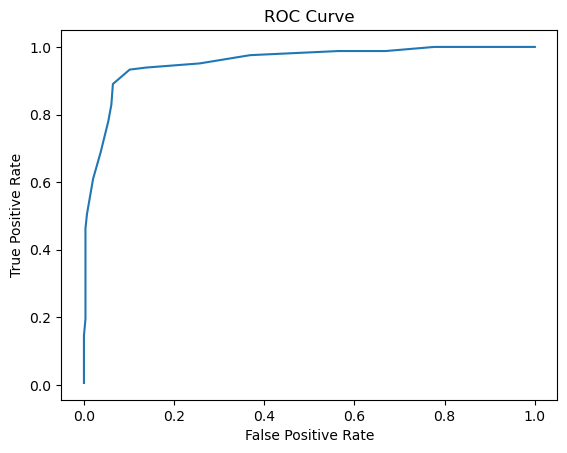

AUC: 0.9555351845748188


In [55]:
# Linear regression ROC curve
fpr, tpr = ml.roc_curve(spambase_linear_regression, spambase_features, spambase_labels)
ml.plot_roc_curve(fpr, tpr)
fpr, tpr = zip(*sorted(zip(fpr, tpr)))
print("AUC: " + str(ml.calculate_auc(fpr, tpr)))

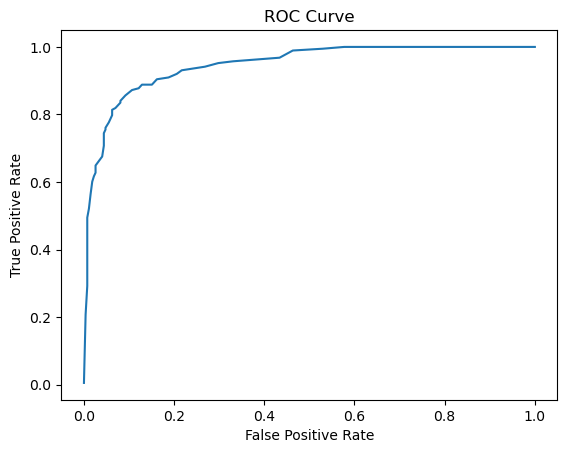

AUC: 0.9463489518147685


In [56]:
# Logistic regression ROC curve
fpr, tpr = ml.roc_curve(spambase_train_logistic_gradient, spambase_features, spambase_labels)
ml.plot_roc_curve(fpr, tpr)
fpr, tpr = zip(*sorted(zip(fpr, tpr)))
print("AUC: " + str(ml.calculate_auc(fpr, tpr)))

# Problem 2

In [57]:
# Load the perceptron data
perceptron_train = pd.read_csv('perceptronData.txt', header=None, delim_whitespace=True,
                               names=['x1', 'x2', 'x3', 'x4', 'y'])

In [58]:
# Display the perceptron data
display(perceptron_train)

,x1,x2,x3,x4,y
0,0.385205,0.183011,0.545166,0.598326,-1
1,0.065588,0.515544,0.645150,0.390085,-1
2,0.554554,0.111030,0.217264,0.703676,-1
3,0.307584,0.117353,0.568609,0.171143,-1
4,0.527311,0.593813,0.023508,0.393045,-1
...,...,...,...,...,...
995,0.587124,0.782808,0.379083,0.059473,-1
996,0.835300,0.905012,0.828545,0.430708,1
997,0.219083,0.181531,0.947483,0.566283,1
998,0.710701,0.700835,0.614247,0.471783,1


## Perceptron

In [59]:
# Run perceptron on the data
perceptron = ml.Perceptron()
weights = perceptron.fit(perceptron_train)

print("Weights: " + str(weights))
print("Weights normalized with threshold: " + str(weights[1:] / -weights[0]))

Iteration: 0 , Mistakes: 16
Iteration: 1 , Mistakes: 1
Iteration: 2 , Mistakes: 0
Weights: [ 0.88037033  1.05164704  1.63153804  0.96446778 -1.40410159 -0.13911745]
Weights normalized with threshold: [-1.19455075 -1.8532406  -1.09552509  1.59489881  0.15802151]
